In [1]:
# In[0]
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse import diags
from math import pi

In [9]:
# Define the constants
n = 5  # Number of oscillators
m = 1  # Mass of oscillators
k = 1  # Spring constant
Displacement = 1  # Amount of displacement
Displaced_Osc = 2  # Which oscillator to displace
L = Displacement * 10  # Total length of coupled oscillators
t = np.linspace(0, 100 * n, 1000 * n)

In [10]:
# Which oscillator we are intrested
OsNum = 1

In [11]:
# =============================
# Build the equations of motion
# =============================
# Build the matrix for the equations of motion
def matrix(n):
    diagonals = [(1 / m) * np.ones(n), -2 * k * np.ones(n), k *
                 np.array([0] + [1] * (n - 1) + [0]), k * np.ones(n - 1)]
    M = diags(diagonals,
              [n, -n, -n + 1, -n - 1])
    return(M)

M = matrix(n).toarray()
#print(M)

# Define the equations of motion
def EoM(pq, t):
    return(M @ pq)

In [13]:
# Define the initial conditions
ic = np.zeros(2 * n)
ic[Displaced_Osc - 1] = Displacement  # Displacing a mass

# Slove the equations of motion
sol = odeint(lambda x, t: EoM(x, M), ic, t)
# print(sol)
# print(sol.shape)

In [19]:
sol

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.98533944e-03,  9.90020992e-01,  4.98534085e-03, ...,
         9.93541776e-02,  1.66269144e-04,  8.32732272e-08],
       [ 1.97423642e-02,  9.60382541e-01,  1.97424527e-02, ...,
         1.94743361e-01,  1.31819117e-03,  2.64902198e-06],
       ...,
       [-1.48031965e-01, -2.05103815e-01,  2.68180274e-01, ...,
        -6.22809690e-01, -1.89331383e-01,  4.46541577e-02],
       [-2.13978898e-01, -1.22364075e-01,  2.03445560e-01, ...,
        -6.68377108e-01, -1.60141148e-01, -2.07460260e-02],
       [-2.76871813e-01, -3.72857795e-02,  1.35150796e-01, ...,
        -6.93792842e-01, -1.34618818e-01, -8.73342646e-02]])

(0, 50)

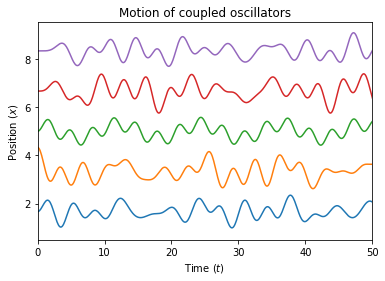

In [14]:
# Plot it out
# ===========
# In[] Plot motion of all the oscillators
plt.figure(1)
for i in range(n):
    plt.plot(t, (sol[:, i] + (i + 1) * L / (n + 1)), label=i + 1)
plt.title(r'Motion of coupled oscillators')
plt.xlabel(r'Time ($t$)')
plt.ylabel(r'Position ($x$)')
plt.xlim(0, n * 10)
# plt.legend()